## 1. Linear Regression on Fish Data

The following data-set contains the number of fish groups of camper caught in a state park (taken from https://stats.idre.ucla.edu/r/dae/zip/). Your task here is to predict the number of fish caught by a fishing party from the following information:

* how many people are in the group
* the number children in the group
* the use of live bait
* whether the group came with a camper to the park.

We have a small data set, of 250 groups, which visited a state park and provided. For comparison the data set is already split into a training set and testset.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [28]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz',filename = 'fishing.npz')
d = np.load('fishing.npz')
Xt = d['Xt'] #"livebait","camper","persons","child"
Xte = d['Xte']
yt = d['yt']
yte = d['yte']
pd.DataFrame(Xt[0:2])

,0,1,2,3
0,1.0,0.0,4.0,0.0
1,1.0,1.0,2.0,0.0


a) Do a linear regression by creating a design matrix with the intercept term and use the fomulae given in the lecture to determine the coefficients on the training set.

Intercept (Achsenabschnitt): Das ist der erwartete Wert von y, wenn alle Features 0 sind.
→ Beispiel: Wenn keine Person, kein Kind, kein Camper, kein Köder, dann schätzt das Modell trotzdem einen Basiswert.

In [29]:
xTrain = pd.DataFrame(Xt, columns=['livebait', 'camper', 'persons', 'child'])
xTest  = pd.DataFrame(Xte, columns=['livebait', 'camper', 'persons', 'child'])

yTrain = pd.DataFrame(yt, columns=['nofish'])
yTest  = pd.DataFrame(yte, columns=['nofish'])

# Intercept hinzufügen
xTrain["intercept"] = 1
xTrain = xTrain[['intercept', 'livebait', 'camper', 'persons', 'child']]


In [30]:

# Berechnung
coefficients = np.linalg.inv(xTrain.T @ xTrain) @ xTrain.T @ yTrain

print("Koeffizienten (Intercept zuerst):")
print(coefficients)

Koeffizienten (Intercept zuerst):
     nofish
0 -8.492228
1  2.482214
2  2.954307
3  4.649539
4 -5.471601


In [31]:
xTest = np.c_[np.ones(xTest.shape[0]), xTest]
yPred = xTest @ coefficients
yPred

,nofish
0,5.456389
1,2.467002
2,10.105928
3,3.289064
4,-1.360475
5,-2.182537
6,5.421310
7,2.467002
8,1.593832
9,6.243371


b) Repeat a) but this time with `LinearRegression` from `sklearn.linear_model`

In [32]:
from sklearn.linear_model import LinearRegression

# Modell erstellen
model = LinearRegression()

# Trainieren
model.fit(xTrain, yTrain)

# Ergebnisse
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

yPred = model.predict(xTest)
yPred

Intercept: [-8.49222821]
Coefficients: [[ 0.          2.4822138   2.95430727  4.64953914 -5.47160051]]


C:\Users\haase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 5.45638921],
       [ 2.46700249],
       [10.10592835],
       [ 3.28906387],
       [-1.36047527],
       [-2.18253664],
       [ 5.42130976],
       [ 2.46700249],
       [ 1.593832  ],
       [ 6.24337113],
       [-2.18253664],
       [ 1.64494112],
       [ 6.24337113],
       [ 6.24337113],
       [-3.00459802],
       [-2.18253664],
       [ 3.76115733],
       [ 1.593832  ],
       [-1.36047527],
       [10.89291027],
       [ 0.77177062],
       [ 2.46700249],
       [-3.00459802],
       [ 1.593832  ],
       [ 6.24337113],
       [ 1.593832  ],
       [-0.8883818 ],
       [ 7.11654163],
       [-1.36047527],
       [-2.18253664],
       [ 3.28906387],
       [10.0708489 ],
       [ 0.77177062],
       [ 1.64494112],
       [ 6.24337113],
       [ 6.24337113],
       [ 0.77177062],
       [-1.36047527],
       [10.89291027],
       [15.54244941],
       [ 2.93909596],
       [ 1.64494112],
       [10.0708489 ],
       [10.0708489 ],
       [ 0.77177062],
       [ 7

c) Determine the Root Mean Square Error (RMSE) and the average negative log-likelihood (NLL) on the testset. For NLL we assume that the conditional probability distrubution (CPD) $p(y|x)$ is given by the density of a Gaussian with constant variance $\sigma^2$. The slope and the intercept of the linear model can be estimated as shown in the lecture. To estimate $\sigma^2$ you can use the variance of the residuals. Use the variance estimation with $1/N$.

Result: $ RMSE \approx 8.58812$, $\hat \sigma^2 \approx 73.7559$, $\tt{NLL} \approx 3.569$

In [33]:
y_true = np.array(yTest).flatten()
y_pred = np.array(yPred).flatten()

resid = y_true - y_pred
N = y_true.shape[0]

# RMSE
rmse = np.sqrt(np.mean(resid**2))

# Varianzschätzung mit 1/N
sigma2 = np.mean(resid**2)

# durchschnittliche NLL pro Testpunkt für N( y | mu, sigma2 )
avg_nll = 0.5 * np.log(2 * np.pi * sigma2) + 0.5 * np.mean((resid**2) / sigma2)

print(f"RMSE: {rmse:.5f}")
print(f"hat sigma^2 (1/N): {sigma2:.5f}")
print(f"durchschnittliche NLL: {avg_nll:.5f}")

RMSE: 8.58813
hat sigma^2 (1/N): 73.75591
durchschnittliche NLL: 3.56932


d) In a)-c) you have trained a probabilistic model $p(y|x) = N(y | \hat{\beta} x, \hat{\sigma}^2)$. With $N(y|\mu,\sigma^2)$, we denote the density of the Gaussian distribution with mean $\mu$ and variance $\sigma^2$. Given, a value $x$ you get a conditional predictive distribution (CPD) $p(y|x)$. How to make a sensefull plot of the CPD?

Note, since $x$ is not a scalar quantity, we cannot plot against the $x$ on the x-axis. So for each pair $y_i, x_i$ of the testset, we use the expactation $\hat{\mu_i} = \mathbb{E}(p(y|x_i))$ (predicted mean) instead of the $x_i$ on the x-axis. On the y-axis, we like to compare the observed value $y_i$ with the result from the model. We could plot $p(y|x_i)$, but that would get too messy with many datapoints in the testet. Instead, we therefore plot $\hat{\mu_i}$ and the 2.5 and 97.5 precentile of $p(y|x_i)$. Such a a plot is sometimes called a **prediction interval plot**

Question 1: What is $\hat{\mu_i}$ for a given $x_i$ in case of a Gaussian?
Answet: Eine Wahrscheinlichkeit dass der Wert in diesem Bereich ist

Do such a plot for the the Gaussian model on the test-set for the Gaussian model defined in c).

Question 2: Why is a Gaussian not ideal for that kind of data?
Answer: Weil Gaussian auch negative Werte annehmen kann und wir aber nicht negative Fische fangen können

Hint: For the Gaussian the 2.5% and the 97.5% percentile is approximatiy given by $\mu \pm 1.96*\sigma$.

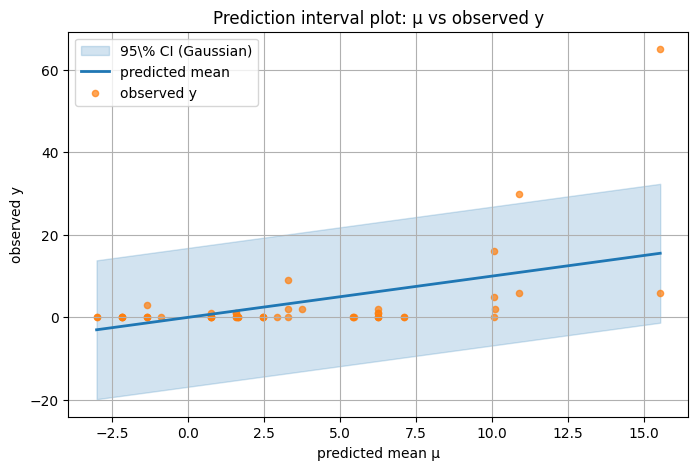

In [34]:
# python
import numpy as np
import matplotlib.pyplot as plt

# Voraussetzung: `y_true`, `y_pred`, `sigma2` existieren im Notebook
mu = np.array(y_pred).flatten()   # \hat{\mu}_i
y = np.array(y_true).flatten()
sigma = np.sqrt(float(sigma2))    # \hat{\sigma}

# Sortieren für sauberes CI-Band
idx = np.argsort(mu)
mu_s = mu[idx]
y_s = y[idx]
lower = mu_s - 1.96 * sigma
upper = mu_s + 1.96 * sigma

plt.figure(figsize=(8,5))
plt.fill_between(mu_s, lower, upper, color='C0', alpha=0.2, label='95\\% CI (Gaussian)')
plt.plot(mu_s, mu_s, color='C0', lw=2, label='predicted mean')
plt.scatter(mu, y, s=20, color='C1', alpha=0.7, label='observed y')
plt.xlabel('predicted mean μ')
plt.ylabel('observed y')
plt.title('Prediction interval plot: μ vs observed y')
plt.legend()
plt.grid(True)
plt.show()

e) This data is count data. Count data has only positive values and also the distribution is discrete. You cannot catch 0.5 fish and that the CPD has probability density > 0 on negative number of fish is wrong too. A Gaussian as a CPD is therefore not ideal.

Now use a model with Poissonian as CPD. If we assume a Poissonian then the probability to catch $k$ fish is given by
$$
  p(k) = \exp(-\mu) \frac{\mu^k}{k!}
$$

and the NLL is thus by:

$$
 \text{NLL} = -\log(p(k)) = \mu  - k \cdot \log(\mu) + \log(k!)
$$

with $\mu$ being the expectation. In our case the average number of fish expected.


A small additional detail: For the Poissonian case, $\mu_i$ needs to be positive. We therefore do not use $\beta^T \cdot x_i$ directly but "pipe it through" an exponential first to make it positive and thus link $\mu_i=exp(\beta^T \cdot x_i)$ to the data.

Use a gradient descent approach on the NLL to find the solution for the parameters. Calculate the RMSE and the NLL on the test set and compare with c).

Hint: On the trainingset for the parameter values (1,1,1,1,1) the NLL should be approx 1508 and the gradient (1518.61, 1403.99, 1171.02, 5701.91, 3258.7). For the NLL a good learning rate would be 0.001 and training should be done for at least 5000 epochs.

In [35]:
import numpy as np
from scipy.stats import poisson

# Negative Log-Likelihood using scipy.stats.poisson.logpmf
def poisson_nll(k, mu):
    # Return the negative log of the Poisson PMF for a given k and mu
    return -poisson.logpmf(k, mu)

# Gradient of Poisson NLL with respect to beta_j for a single data point
def gradient_poisson_nll(x, k, mu):
    # The gradient of NLL with respect to beta_j
    return (1 - k / mu) * mu * x

# Gradient descent for minimizing NLL
def gradient_descent(X, y, learning_rate=0.001, epochs=5000):
    # Initialize beta with ones (same size as number of features)
    beta = np.ones(X.shape[1])
    nll_values = []
    # Iterate through epochs
    for epoch in range(epochs):
        gradients = np.zeros_like(beta)
        nll = 0

        # Calculate the NLL and gradients for each data point
        for i in range(len(y)):
            xi = X[i]  # Feature vector for data point i
            ki = y[i]  # Observed count (number of fish) for data point i
            mu_i = np.exp(np.dot(beta, xi))  # Expected value, mu_i = exp(beta^T * x_i)

            # Compute NLL for this data point using Poisson logpmf
            nll += poisson_nll(ki, mu_i)

            # Compute the gradient of the NLL w.r.t. beta for this data point
            gradients += gradient_poisson_nll(xi, ki, mu_i)

        # Average gradient and NLL over all data points
        gradients /= len(y)
        nll /= len(y)
        nll_values.append(nll)

        # Update parameters using gradient descent
        beta -= learning_rate * gradients

        # Optionally print the progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: NLL = {nll}")
            print(f"Gradients {gradients}")

    return beta, nll, nll_values

# RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))



# Perform gradient descent to minimize NLL
beta, nll, nll_values = gradient_descent(np.array(xTrain), np.array(yTrain["nofish"]), learning_rate=0.001, epochs=5000)

# Test predictions on the training set
mu_pred = np.exp(np.dot(np.array(xTrain), beta))  # Predicted means for each data point

# Calculate RMSE on the training set
rmse_value = rmse(np.array(yTrain), mu_pred)

# Print results
print(f"Final parameters: {beta}")
print(f"Training RMSE: {rmse_value}")
print(f"Training NLL: {nll}")

Epoch 0: NLL = 1507.9856602262093
Gradients [1518.61304305 1403.99474131 1171.02247951 5701.91224653 3258.70389229]
Epoch 1000: NLL = 4.167324197131498
Gradients [ 0.71958836  0.44964899  0.29153156 -0.43467578 -0.15826758]
Epoch 2000: NLL = 3.730689351269206
Gradients [ 0.39012827  0.08990098 -0.005933   -0.13690369 -0.08360057]
Epoch 3000: NLL = 3.606422012945125
Gradients [ 0.27767662 -0.01129965 -0.05067038 -0.06530718 -0.04549139]
Epoch 4000: NLL = 3.538082432151695
Gradients [ 0.21914007 -0.04711354 -0.0494389  -0.0390317  -0.02559578]
Final parameters: [-1.08852056  0.2597268   0.54509109  0.85448041 -1.65101241]
Training RMSE: 13.112242579848253
Training NLL: 3.491792909025199


f) Do the same plot as in d) but this time with a Poisson CPD. Hint you can use scipy.stats.poisson to calculate the percentiles.

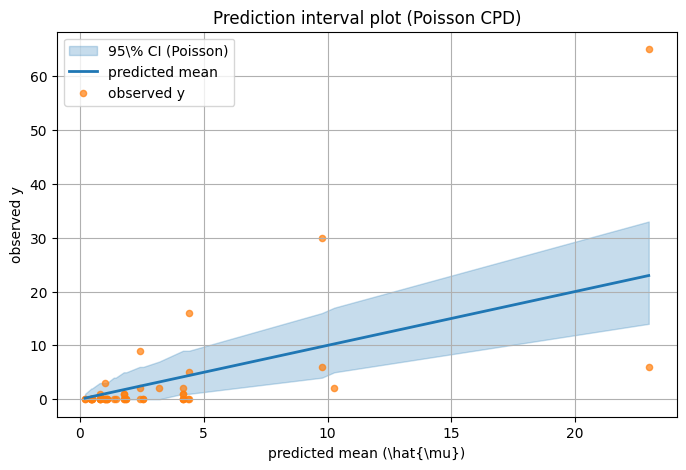

In [36]:
# python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Erwartung: `beta` (gelerntes Parameter-Vektor) und `Xte`, `yte` sind im Notebook vorhanden.
# Erstelle Design-Matrix für Testset (Intercept + Features)
X_test = np.hstack([np.ones((Xte.shape[0], 1)), Xte])
y_test = np.array(yte).flatten()

# Predicted mean for Poisson: mu = exp(X beta)
mu = np.exp(X_test @ beta)

# 2.5% und 97.5% Perzentile der Poisson-Verteilung für jedes mu_i
lower = poisson.ppf(0.025, mu)
upper = poisson.ppf(0.975, mu)

# Sortieren nach mu für sauberes Band
idx = np.argsort(mu)
mu_s = mu[idx]
lower_s = lower[idx]
upper_s = upper[idx]
y_s = y_test[idx]

plt.figure(figsize=(8,5))
plt.fill_between(mu_s, lower_s, upper_s, color='C0', alpha=0.25, label='95\\% CI (Poisson)')
plt.plot(mu_s, mu_s, color='C0', lw=2, label='predicted mean')
plt.scatter(mu, y_test, s=20, color='C1', alpha=0.7, label='observed y')
plt.xlabel('predicted mean (\\hat{\\mu})')
plt.ylabel('observed y')
plt.title('Prediction interval plot (Poisson CPD)')
plt.legend()
plt.grid(True)
plt.show()

## 2. Eigengesichter
Die Hauptkomponentenanalyse lässt sich auch auf Bilder anwenden, indem man die Bildzeilen in einem einzigen Vektor aneinander hängt (*Stacking*). Die zugehörigen Richtungen extremaler Varianz heißen *Eigengesichter*. Sie eignen sich nicht nur zur Datenkompression, sondern auch zum Aufbau eines einfachen Gesichtserkennungssystems (s. M. Turk and A. Pentland, “Eigenfaces for Recognition”, Journal of Cognitive Neuroscience, vol. 3, no. 1, pp. 71–86, 1991). Für die Funktion eines solchen Systems ist es wichtig, dass die Gesichter zentriert und in derselben Größe abgebildet sind. Ein dafür geeigneter Datensatz ist ''Labeled Faces in the Wild'' der Universität von Massachusetts in Amherst (`http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz`, 233MB) mit Bildern von 13.000 Personen des öffentlichen Lebens aus dem Internet, alle mit Namen gelabelt.

Aufgaben:

a) Laden Sie sich den oben angegebenen Datensatz herunter. Erstellen Sie ein Python- Skript, dass die Verzeichnisse des Datensatzes durchsucht und die Personen ermittelt, für die mindestens 70 Bilder existieren. Die dafür geeigneten Funktionen finden sich im Standardmodul `os` bzw. `os.path`.

In [37]:
import kagglehub
import shutil
import os

# Aktuelles Arbeitsverzeichnis bestimmen
current_dir = os.getcwd()
target_dir = os.path.join(current_dir, "lfw_dataset")

# 1) Download mit kagglehub
path = kagglehub.dataset_download("jessicali9530/lfw-dataset")
print("Dataset wurde geladen unter:", path)

# 2) Wenn Zielordner noch nicht existiert → kopieren
if not os.path.exists(target_dir):
    shutil.copytree(path, target_dir)
    print("Daten wurden kopiert nach:", target_dir)
else:
    print("Zielordner existiert bereits:", target_dir)


Dataset wurde geladen unter: C:\Users\haase\.cache\kagglehub\datasets\jessicali9530\lfw-dataset\versions\4
Zielordner existiert bereits: C:\Users\haase\Desktop\MachineLearning\Aufgabe2\lfw_dataset


In [38]:
import os

base_dir = os.path.join(target_dir, "lfw-deepfunneled")

# Sicherstellen, dass der Pfad existiert
assert os.path.exists(base_dir), f"Kein gültiger LFW-Ordner gefunden unter: {base_dir}"

image_paths = []
file_list = []
persons = []

# Verzeichnis durchsuchen
for root, dirs, files in os.walk(base_dir):
    if len(files) > 70:
        for file in files:
            if file.endswith('.jpg'):
                image_paths.append(os.path.join(root, file))
                name = "_".join(file.split("_")[:2])
                if name in file_list:
                    continue
                file_list.append(name)

# DataFrame mit allen Bildpfaden
df_images = pd.DataFrame(image_paths, columns=['Image_Path'])
# Set erstellen damit nur einzigartige Personen angezeigt werden
print(f'following {len(set(file_list))} persons are 70+ times in the dataset {set(file_list)}')

following 7 persons are 70+ times in the dataset {'Ariel_Sharon', 'George_W', 'Donald_Rumsfeld', 'Gerhard_Schroeder', 'Colin_Powell', 'Tony_Blair', 'Hugo_Chavez'}


b) Erstellen Sie ein Python-Skript, das alle Bilder bis auf eines pro Person (diese werden später zum Testen des Klassifikators gebraucht) dieser am häufigsten abgebildeten Personen lädt, diese in Vektoren stackt und dann in einer gemeinsamen Designmatrix ablegt. Zum Laden der Bilder in Numpy-Arrays verwenden Sie am einfachsten das Modul `scikit-image`. Schneiden Sie zunächst einen einheitlichen zentralen Ausschnitt aus, der nur Augen und Mund enthält. Skalieren Sie die Bilder auf die Größe 32 × 32. Achten Sie darauf, vorher die Farbbilder in Grauwerte umzuwandeln (z.B. mit der Option `as_gray = True`) Legen Sie zusätzlich einen Vektor an, in dem der Name der Person (d.h. der Ordnername) für jede Zeile steht. Führen Sie die gleiche Art der Verarbeitung mit dem übrig gebliebenen Testbild pro Person durch und speichern Sie diese getrennt ab.

In [39]:
from skimage import io, color
from skimage.transform import resize
from pathlib import Path

# Gruppiert die Bilder nach Personen
grouped = df_images.groupby(df_images['Image_Path'].apply(lambda x: Path(x).parent.name))

train_paths = []
test_paths = []

# Erstellt je eine Liste mit Trainings- (alle übrigen Bilder) und Testpfaden (1 Bild pro Person)
for name, group in grouped:
    image_paths = group['Image_Path'].tolist()
    test_paths.append(image_paths[0])
    train_paths.extend(image_paths[1:])

print(test_paths)

['C:\\Users\\haase\\Desktop\\MachineLearning\\Aufgabe2\\lfw_dataset\\lfw-deepfunneled\\lfw-deepfunneled\\Ariel_Sharon\\Ariel_Sharon_0001.jpg', 'C:\\Users\\haase\\Desktop\\MachineLearning\\Aufgabe2\\lfw_dataset\\lfw-deepfunneled\\lfw-deepfunneled\\Colin_Powell\\Colin_Powell_0001.jpg', 'C:\\Users\\haase\\Desktop\\MachineLearning\\Aufgabe2\\lfw_dataset\\lfw-deepfunneled\\lfw-deepfunneled\\Donald_Rumsfeld\\Donald_Rumsfeld_0001.jpg', 'C:\\Users\\haase\\Desktop\\MachineLearning\\Aufgabe2\\lfw_dataset\\lfw-deepfunneled\\lfw-deepfunneled\\George_W_Bush\\George_W_Bush_0001.jpg', 'C:\\Users\\haase\\Desktop\\MachineLearning\\Aufgabe2\\lfw_dataset\\lfw-deepfunneled\\lfw-deepfunneled\\Gerhard_Schroeder\\Gerhard_Schroeder_0001.jpg', 'C:\\Users\\haase\\Desktop\\MachineLearning\\Aufgabe2\\lfw_dataset\\lfw-deepfunneled\\lfw-deepfunneled\\Hugo_Chavez\\Hugo_Chavez_0001.jpg', 'C:\\Users\\haase\\Desktop\\MachineLearning\\Aufgabe2\\lfw_dataset\\lfw-deepfunneled\\lfw-deepfunneled\\Tony_Blair\\Tony_Blair_0001

In [40]:
def preprocess_image(image_path, crop_coords=(50, 50, 100, 100), output_size=(32, 32)):
    """
    Load, crop, convert to grayscale, resize, and flatten the image.
    """
    image = io.imread(image_path)

    # Wenn farbig, in Graustufen umwandeln
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Bild zuschneiden
    h, w = image.shape
    cropped_image = image[crop_coords[0]:h-crop_coords[1], crop_coords[2]:w-crop_coords[3]]

    # Skalieren auf 32x32 Pixel
    resized_image = resize(cropped_image, output_size, anti_aliasing=True)

    # Bild in Vektor umwandeln
    return resized_image.flatten()

In [41]:
import numpy as np

train_data = []
train_labels = []

# Daten und Label separieren
for path in train_paths:
    person_name = Path(path).parent.name
    processed_image = preprocess_image(path)
    train_data.append(processed_image)
    train_labels.append(person_name)

# Designmatrix durch Stacking der Bilder erstellen und Labels in Array umwandeln
X_train = np.vstack(train_data)
y_train = np.array(train_labels)

In [42]:
# Selbes Vorhergehensweise für Testdaten s.o.

test_data = []
test_labels = []

for path in test_paths:
    person_name = Path(path).parent.name
    processed_image = preprocess_image(path)
    test_data.append(processed_image)
    test_labels.append(person_name)

X_test = np.vstack(test_data)
y_test = np.array(test_labels)


In [43]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1281, 1024)
Test set size: (7, 1024)


c) Wenden Sie nun Ihre Hauptkomponentenanalyse aus Arbeitsblatt 1 auf Ihre Designmatrix (Achtung: kopieren Sie alle Trainingsbilder für alle Personen als Zeilen in eine gemeinsame Designmatrix!) an. Stellen Sie die ersten 150 Eigenwerte in einem Diagramm und die ersten 12 Eigengesichter durch Umformung der gestackten Darstellung in das ursprüngliche Bildformat
dar. Interpretieren Sie das Ergebnis.

In [44]:
def principalComponentAnalysis(x, num_components=None, normalize=True):
    """Function for the principal component analysis (PCA)

    Args: x (): Set of n dimensional data points xi
        num_components (): Number of principal components to keep
        normalize (bool): If normalizing the data before PCA

    Returns: Dictionary with the PCA results.
    """

    # 1. Zentrieren der Daten
    x_centered = x - np.mean(x, axis=0)

    # 2. Normierung der Daten (optional, ohne externe Bibliothek)
    if normalize:
        std_dev = np.std(x_centered, axis=0, ddof=1)  # ddof=1 für Stichprobenstandardabweichung
        x_centered = x_centered / std_dev

    # 3. SVD zur Berechnung der Hauptkomponentenanalyse
    U, D, Vt = np.linalg.svd(x_centered, full_matrices=False)

    # 4. Die Eigenwerte der Kovarianzmatrix
    n = x.shape[0]
    eigenvalues = (D ** 2) / (n - 1)

    # 5. Erklärte Varianz (Eigenwerte / Gesamtvarianz)
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    # 6. Kumulative erklärte Varianz
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # 7. Projektion der Daten auf die Hauptkomponenten
    if num_components is not None:
        U = U[:, :num_components]
        D = D[:num_components]
        Vt = Vt[:num_components, :]
        transformed_data = U @ np.diag(D)
    else:
        transformed_data = U @ np.diag(D)

    return {
        'eigenvalues': eigenvalues,
        'explained_variance_ratio': explained_variance_ratio,
        'cumulative_explained_variance': cumulative_explained_variance,
        'components': Vt.T,
        'transformed_data': transformed_data
    }

pca_results = principalComponentAnalysis(X_train, normalize=True)
eigenvalues = pca_results['eigenvalues'][:150]

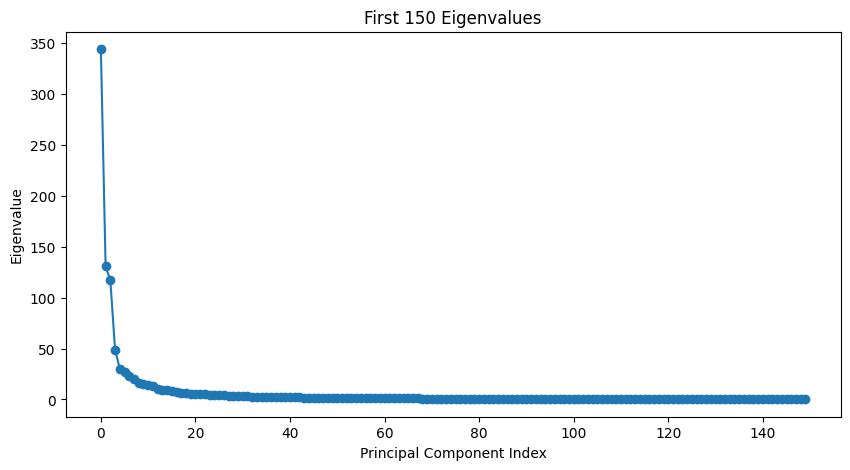

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(eigenvalues, marker='o', linestyle='-')
plt.title('First 150 Eigenvalues')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.show()

Man sieht auch hier wie bereits mit den ersten Komponenten oder Eigengesichter die Varianz gut erklärt wird, bzw. immer weiter abnimmt. Es reichen schon wenige, bis der Zugewinn später minimal ist.

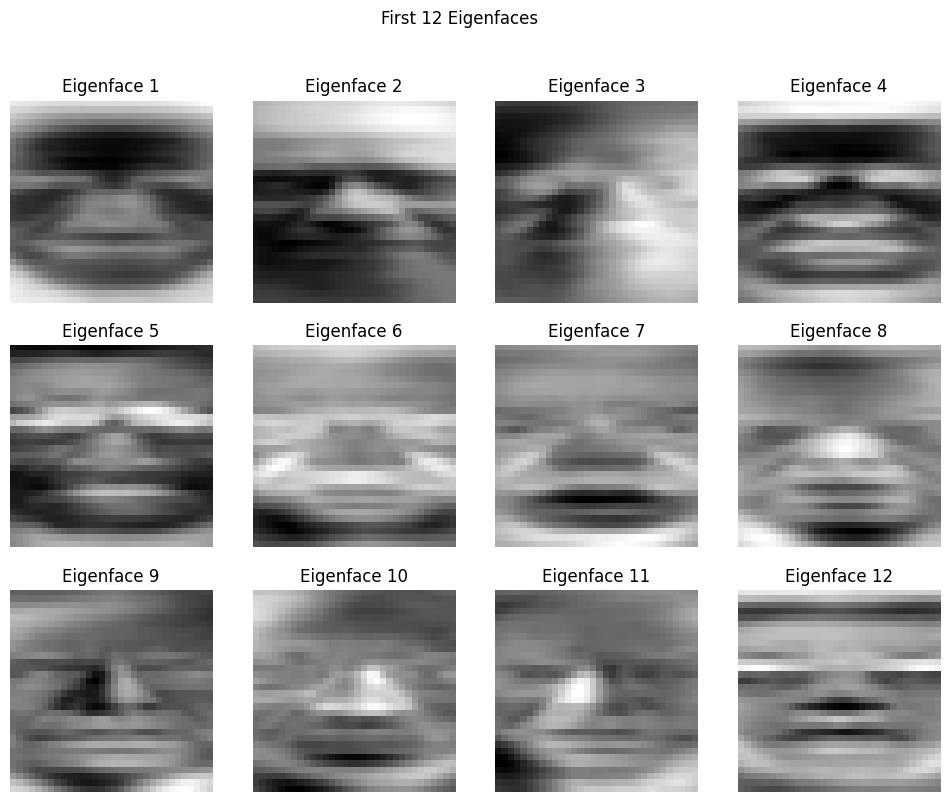

In [46]:
num_eigenfaces = 12
eigenfaces = pca_results['components'][:, :num_eigenfaces]

# Reshape
eigenface_images = [eigenfaces[:, i].reshape(32, 32) for i in range(num_eigenfaces)]

# Plot
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle("First 12 Eigenfaces")

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenface_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Eigenface {i+1}")
plt.show()

d. Von den Testbildern wird nun ebenfalls der Mittelwert der Trainingsdaten abgezogen (s. Schritt 1 im PCA-Algorithmus). Projizieren Sie jedes der Trainings- und Testbilder auf die ersten 7 Eigengesichter, d.h. Sie erhalten so für jedes Trainings- und Testbild 7 Merkmale. Die Gesichtserkennung geschieht nun dadurch, dass Sie den euklidischen Abstand des Testbildes in diesem 7-dimensionalen Merkmalsraum zu allen Trainingsbildern berechnen. Die Person des am nächsten liegenden Trainingsbildes (d.h. mit dem minimalen euklidischen Abstand) ist dann (vermutlich) auch die korrekte Person für das Testbild (Nächster-Nachbar-Klassifikator). Welche Bilder werden korrekt klassifiziert, welche Verwechslungen gibt es?

In [47]:
# 7 Komponenten
num_components = 7
principal_components = pca_results['components'][:, :num_components]

# Daten zentrieren durch Abzug von Mittelwert
X_train_centered = X_train - np.mean(X_train, axis=0)
X_test_centered = X_test - np.mean(X_train, axis=0)

# Projektion der Daten auf die 7 Komponenten
X_train_projected = X_train_centered @ principal_components
X_test_projected = X_test_centered @ principal_components

predicted_labels = []
correctly_classified = []
misclassified = []

# Nearest Neighbor Classification
for i, test_vector in enumerate(X_test_projected):

    # Euklidische Distanz berechnen
    distances = np.linalg.norm(X_train_projected - test_vector, axis=1)

    # Index des nächsten Nachbarn
    closest_index = np.argmin(distances)

    predicted_label = train_labels[closest_index]
    predicted_labels.append(predicted_label)

    # Evaluierung
    if predicted_label == test_labels[i]:
        correctly_classified.append(i)
    else:
        misclassified.append((i, predicted_label, test_labels[i]))

print("Correctly classified images:", correctly_classified)
print("Misclassifications (test index, predicted label, actual label):", misclassified)

accuracy = len(correctly_classified) / len(test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Correctly classified images: [0, 1, 3, 5]
Misclassifications (test index, predicted label, actual label): [(2, 'George_W_Bush', 'Donald_Rumsfeld'), (4, 'Hugo_Chavez', 'Gerhard_Schroeder'), (6, 'George_W_Bush', 'Tony_Blair')]
Accuracy: 57.14%
